YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


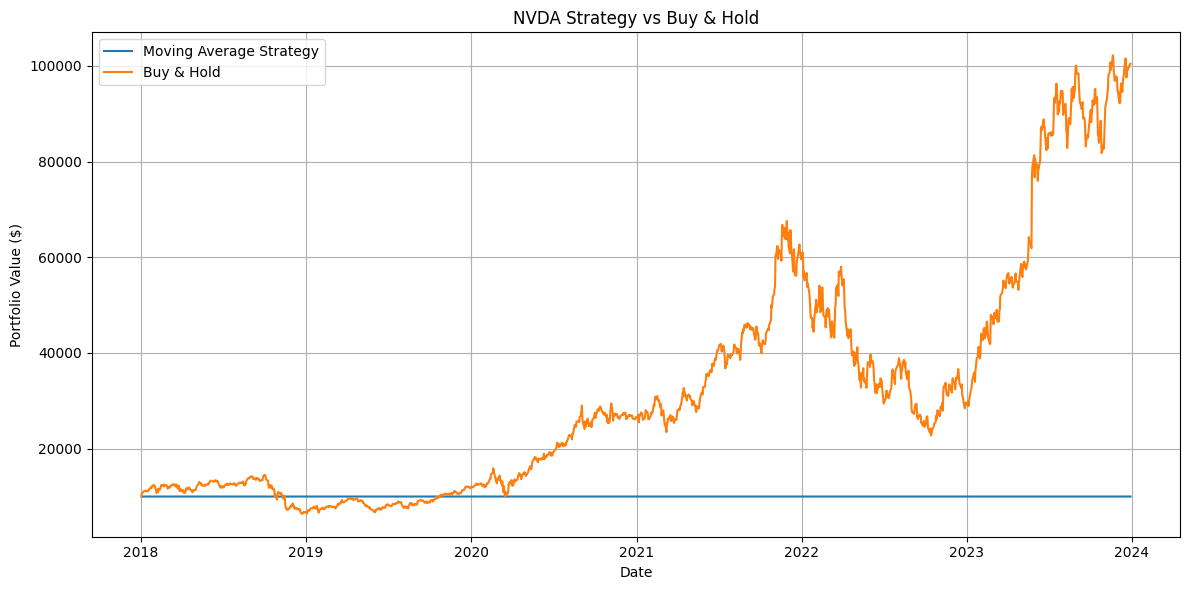

Final Portfolio Value: $10003.21
Total Return: 0.03%
Annualized Return: 0.01%


In [1]:
# Import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download NVDA Data
nvda = yf.download("NVDA", start="2018-01-01", end="2024-01-01")[['Close']]
nvda.columns = ['Close']  # Flatten columns to avoid multi-index issues

# Compute Moving Averages
nvda['MA50'] = nvda['Close'].rolling(window=50).mean()
nvda['MA200'] = nvda['Close'].rolling(window=200).mean()

# Define Buy/Sell Signal Logic
nvda['Signal'] = 0
nvda.loc[nvda['MA50'] > nvda['MA200'], 'Signal'] = 1
nvda['Position'] = nvda['Signal'].diff()

# Simulate Portfolio
initial_cash = 10000
nvda['Holdings'] = nvda['Signal'].shift(1) * nvda['Close']
nvda['Cash'] = initial_cash - (nvda['Close'].diff().fillna(0) * nvda['Signal'].shift(1).fillna(0)).cumsum()
nvda['Total'] = nvda['Cash'] + nvda['Holdings']

# Buy and Hold Strategy
nvda['BuyHold'] = initial_cash * (nvda['Close'] / nvda['Close'].iloc[0])

# Plot Strategy vs Buy & Hold
plt.figure(figsize=(12, 6))
plt.plot(nvda['Total'], label='Moving Average Strategy')
plt.plot(nvda['BuyHold'], label='Buy & Hold')
plt.title("NVDA Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary Statistics
final_value = nvda['Total'].iloc[-1]
total_return = (final_value - initial_cash) / initial_cash
annualized_return = (1 + total_return) ** (1 / (len(nvda) / 252)) - 1  # 252 trading days/year

print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")

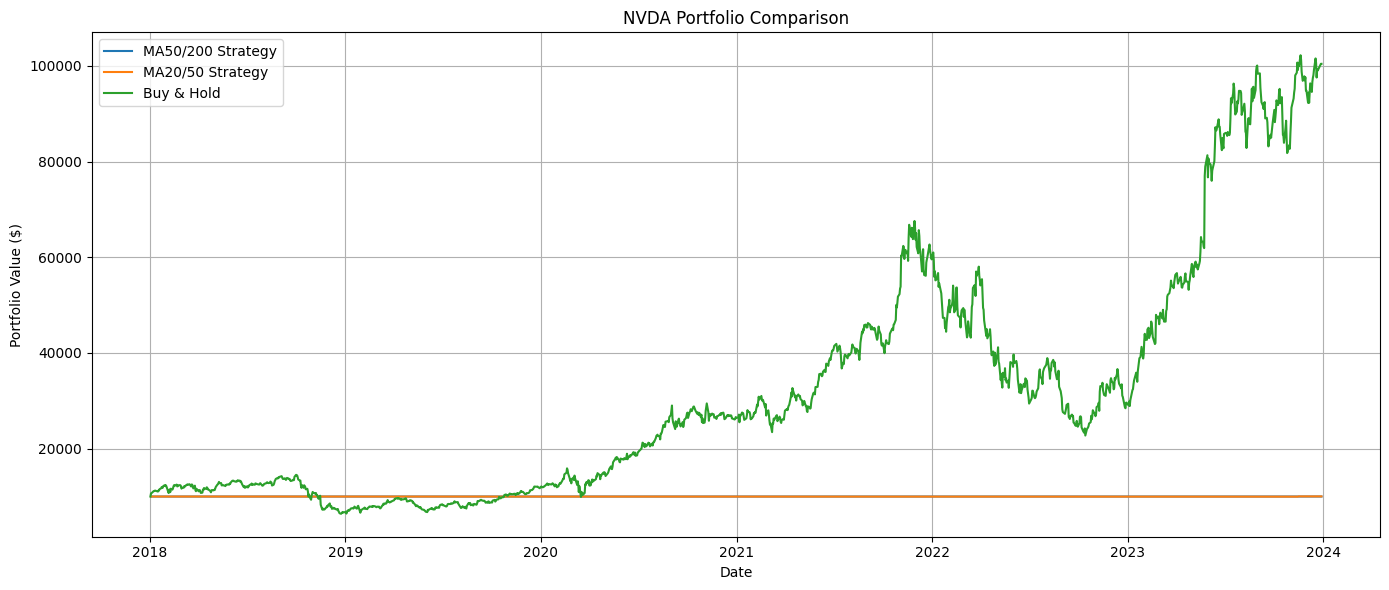

MA20/50 Strategy Summary
Final Portfolio Value: $10026.96
Total Return: 0.27%
Annualized Return: 0.04%


In [2]:
# MA20 / MA50 Strategy Comparison

# Recompute new MAs
nvda['MA20'] = nvda['Close'].rolling(window=20).mean()
nvda['MA50_new'] = nvda['Close'].rolling(window=50).mean()

# Generate new signals
nvda['Signal_20_50'] = 0
nvda.loc[nvda['MA20'] > nvda['MA50_new'], 'Signal_20_50'] = 1
nvda['Position_20_50'] = nvda['Signal_20_50'].diff()

# Simulate Portfolio for MA20/50
nvda['Holdings_20_50'] = nvda['Signal_20_50'].shift(1) * nvda['Close']
nvda['Cash_20_50'] = initial_cash - (nvda['Close'].diff().fillna(0) * nvda['Signal_20_50'].shift(1).fillna(0)).cumsum()
nvda['Total_20_50'] = nvda['Cash_20_50'] + nvda['Holdings_20_50']

# Plot comparison
plt.figure(figsize=(14, 6))
plt.plot(nvda['Total'], label='MA50/200 Strategy')
plt.plot(nvda['Total_20_50'], label='MA20/50 Strategy')
plt.plot(nvda['BuyHold'], label='Buy & Hold')
plt.title("NVDA Portfolio Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary for MA20/50 Strategy
final_value_20_50 = nvda['Total_20_50'].iloc[-1]
total_return_20_50 = (final_value_20_50 - initial_cash) / initial_cash
annualized_return_20_50 = (1 + total_return_20_50) ** (1 / (len(nvda) / 252)) - 1

print("MA20/50 Strategy Summary")
print(f"Final Portfolio Value: ${final_value_20_50:.2f}")
print(f"Total Return: {total_return_20_50 * 100:.2f}%")
print(f"Annualized Return: {annualized_return_20_50 * 100:.2f}%")

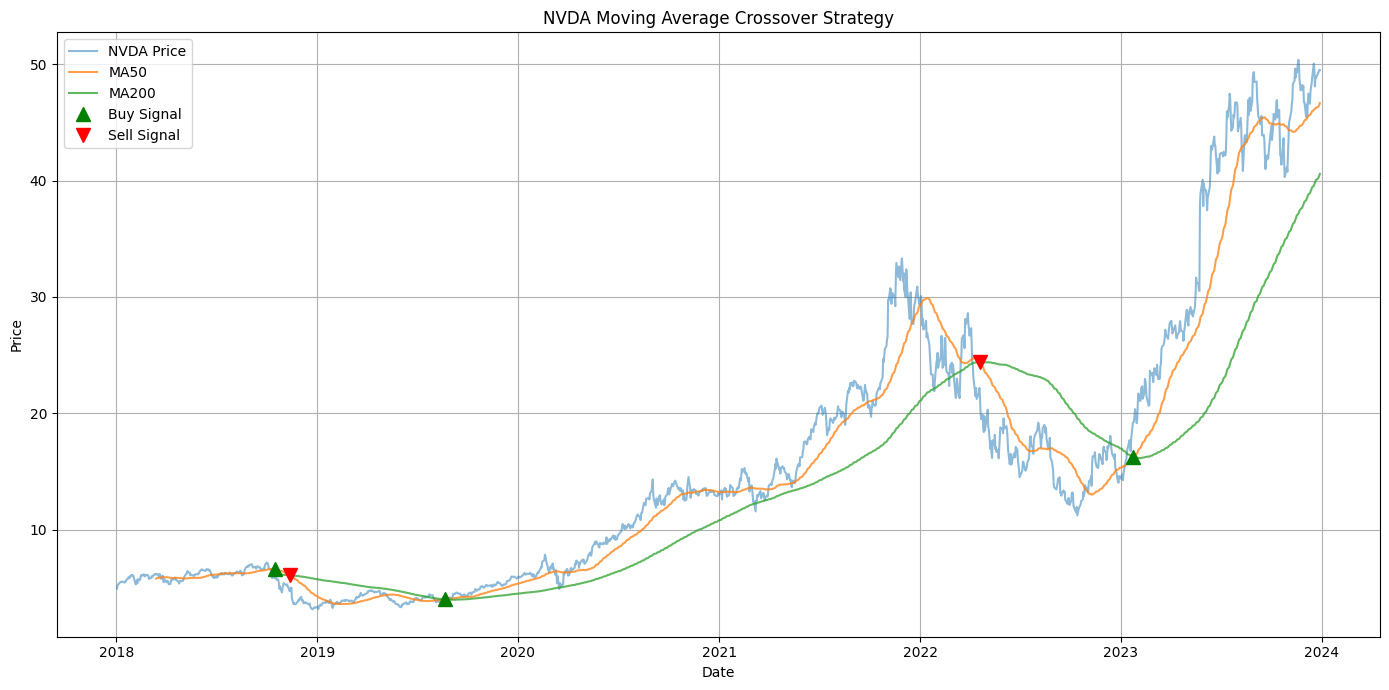

In [3]:
# Define Buy/Sell Signal Logic
nvda['Signal'] = 0
nvda.loc[nvda['MA50'] > nvda['MA200'], 'Signal'] = 1
nvda['Position'] = nvda['Signal'].diff()

# Plot Entry/Exit Points
plt.figure(figsize=(14,7))
plt.plot(nvda['Close'], label='NVDA Price', alpha=0.5)
plt.plot(nvda['MA50'], label='MA50', alpha=0.75)
plt.plot(nvda['MA200'], label='MA200', alpha=0.75)

# Buy Signals
plt.plot(nvda[nvda['Position'] == 1].index, 
         nvda['MA50'][nvda['Position'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')

# Sell Signals
plt.plot(nvda[nvda['Position'] == -1].index, 
         nvda['MA50'][nvda['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('NVDA Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Performance Summary (Manual)

In [4]:
import numpy as np

returns = nvda['Total'].pct_change().dropna()

# Calculate summary metrics
total_return = (nvda['Total'].iloc[-1] / nvda['Total'].iloc[0]) - 1
annualized_return = (1 + total_return) ** (252 / len(returns)) - 1
volatility = returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / volatility
max_drawdown = ((nvda['Total'] / nvda['Total'].cummax()) - 1).min()

print("===== Strategy Performance Summary =====")
print(f"Total Return:        {total_return:.2%}")
print(f"Annualized Return:   {annualized_return:.2%}")
print(f"Annual Volatility:   {volatility:.2%}")
print(f"Sharpe Ratio:        {sharpe_ratio:.2f}")
print(f"Max Drawdown:        {max_drawdown:.2%}")

===== Strategy Performance Summary =====
Total Return:        nan%
Annualized Return:   nan%
Annual Volatility:   0.12%
Sharpe Ratio:        nan
Max Drawdown:        -0.22%


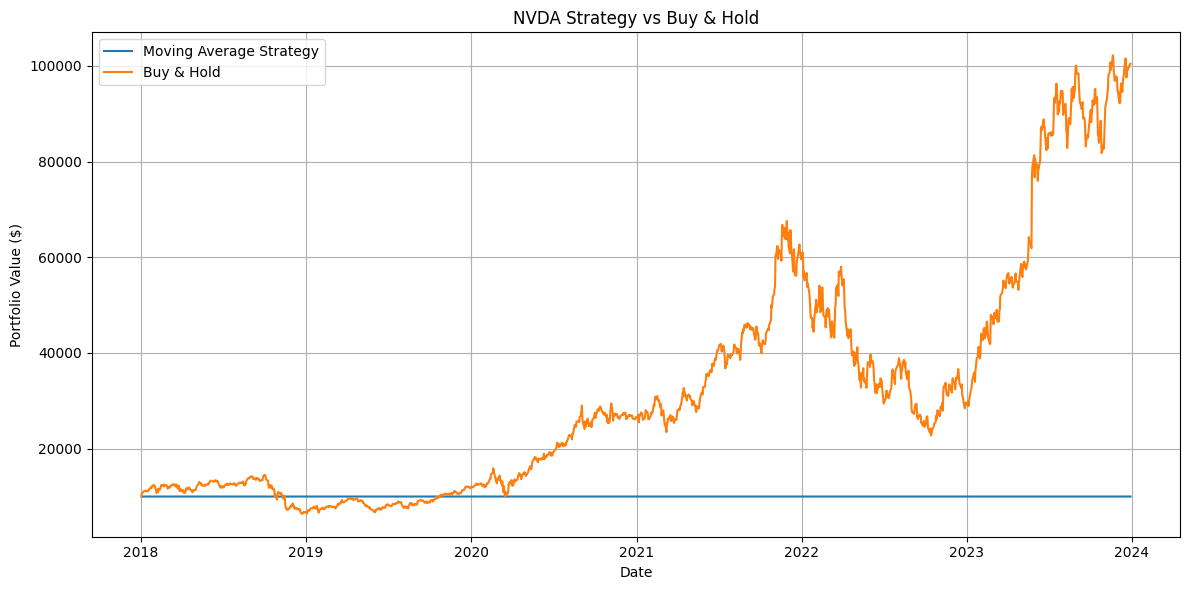

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(nvda['Total'], label='Moving Average Strategy')
plt.plot(nvda['BuyHold'], label='Buy & Hold')
plt.title("NVDA Strategy vs Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("ma_strategy_vs_buyhold.png")
plt.show()

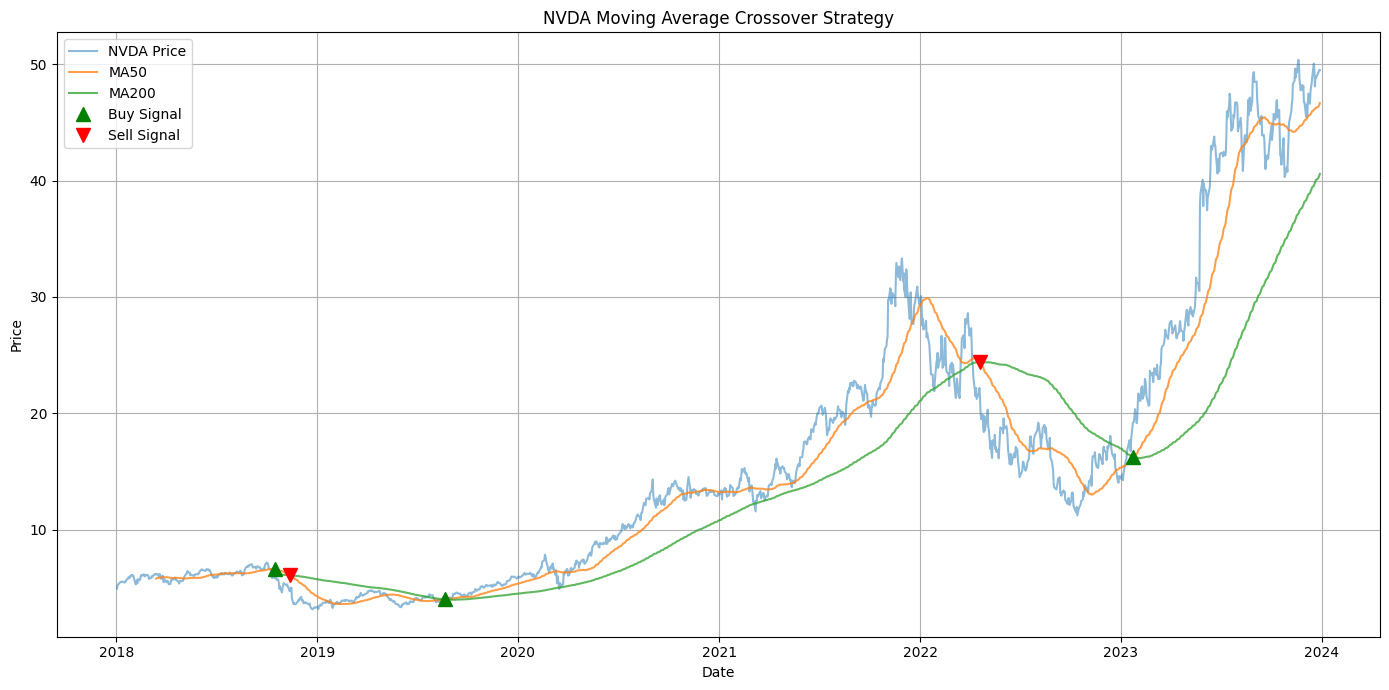

In [6]:
plt.figure(figsize=(14,7))
plt.plot(nvda['Close'], label='NVDA Price', alpha=0.5)
plt.plot(nvda['MA50'], label='MA50', alpha=0.75)
plt.plot(nvda['MA200'], label='MA200', alpha=0.75)

# Buy Signals
plt.plot(nvda[nvda['Position'] == 1].index, 
         nvda['MA50'][nvda['Position'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')

# Sell Signals
plt.plot(nvda[nvda['Position'] == -1].index, 
         nvda['MA50'][nvda['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('NVDA Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("ma_crossover_signals.png") 
plt.show()

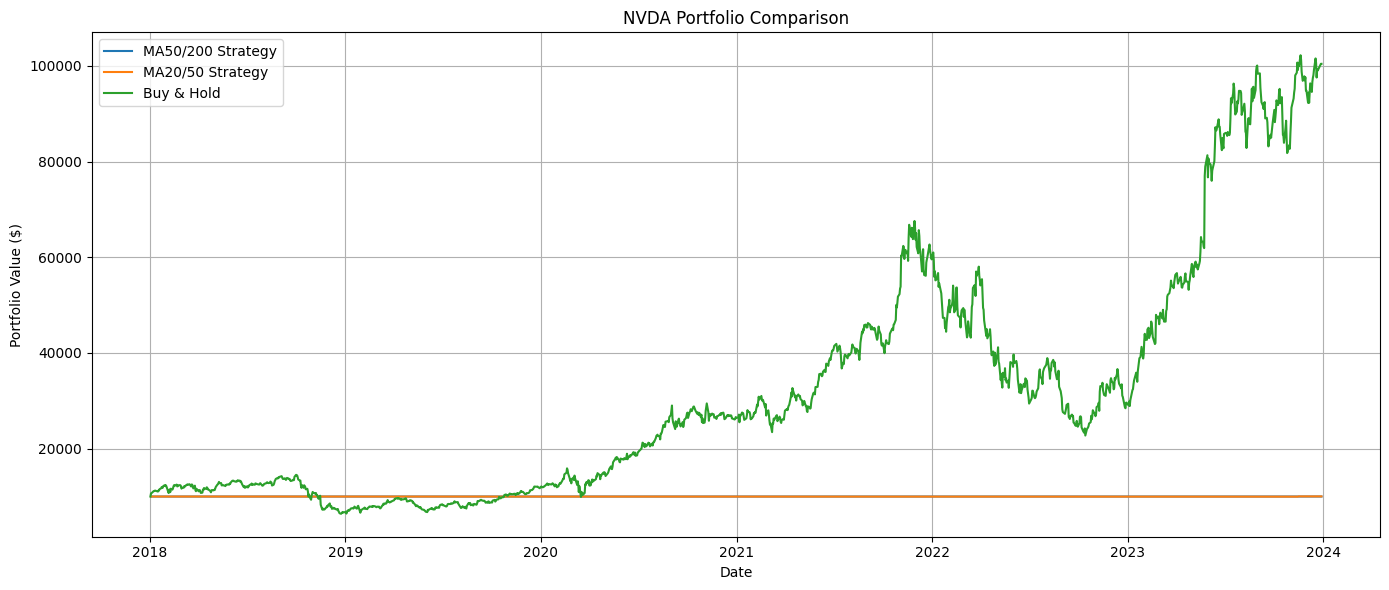

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(nvda['Total'], label='MA50/200 Strategy')
plt.plot(nvda['Total_20_50'], label='MA20/50 Strategy')
plt.plot(nvda['BuyHold'], label='Buy & Hold')
plt.title("NVDA Portfolio Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("ma_strategy_comparison.png")

plt.show()